# CMPE 351 Group Project Milestone 2
### Research Question 3
What are the most significant features affecting Airbnb listing prices?

New York City, London, Paris

In [26]:
# imports

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import missingno as msno
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [3]:
# read data
nyc_data = pd.read_excel("./data/nyc_listings.xlsx", engine="openpyxl")
london_data = pd.read_excel("./data/london_listings.xlsx", engine="openpyxl")
paris_data = pd.read_excel("./data/paris_listings.xlsx", engine="openpyxl")

In [4]:
# Data Type Exploration

# nyc_data.head()
# london_data.head()
# paris_data.head()

allData = pd.concat([nyc_data, london_data, paris_data], ignore_index=True)
allData.info()
# allData.describe(include="price")
allData["price"].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205309 entries, 0 to 205308
Data columns (total 75 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   id                                            205309 non-null  int64         
 1   listing_url                                   205309 non-null  object        
 2   scrape_id                                     205309 non-null  int64         
 3   last_scraped                                  205309 non-null  datetime64[ns]
 4   source                                        205309 non-null  object        
 5   name                                          205309 non-null  object        
 6   description                                   38121 non-null   object        
 7   neighborhood_overview                         113192 non-null  object        
 8   picture_url                                   205298 n

count    178973.000000
mean        200.075900
std         614.478741
min           1.000000
25%          75.000000
50%         120.000000
75%         200.000000
max      100000.000000
Name: price, dtype: float64

2268214

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               53514
Length: 75, dtype: int64

<Axes: >

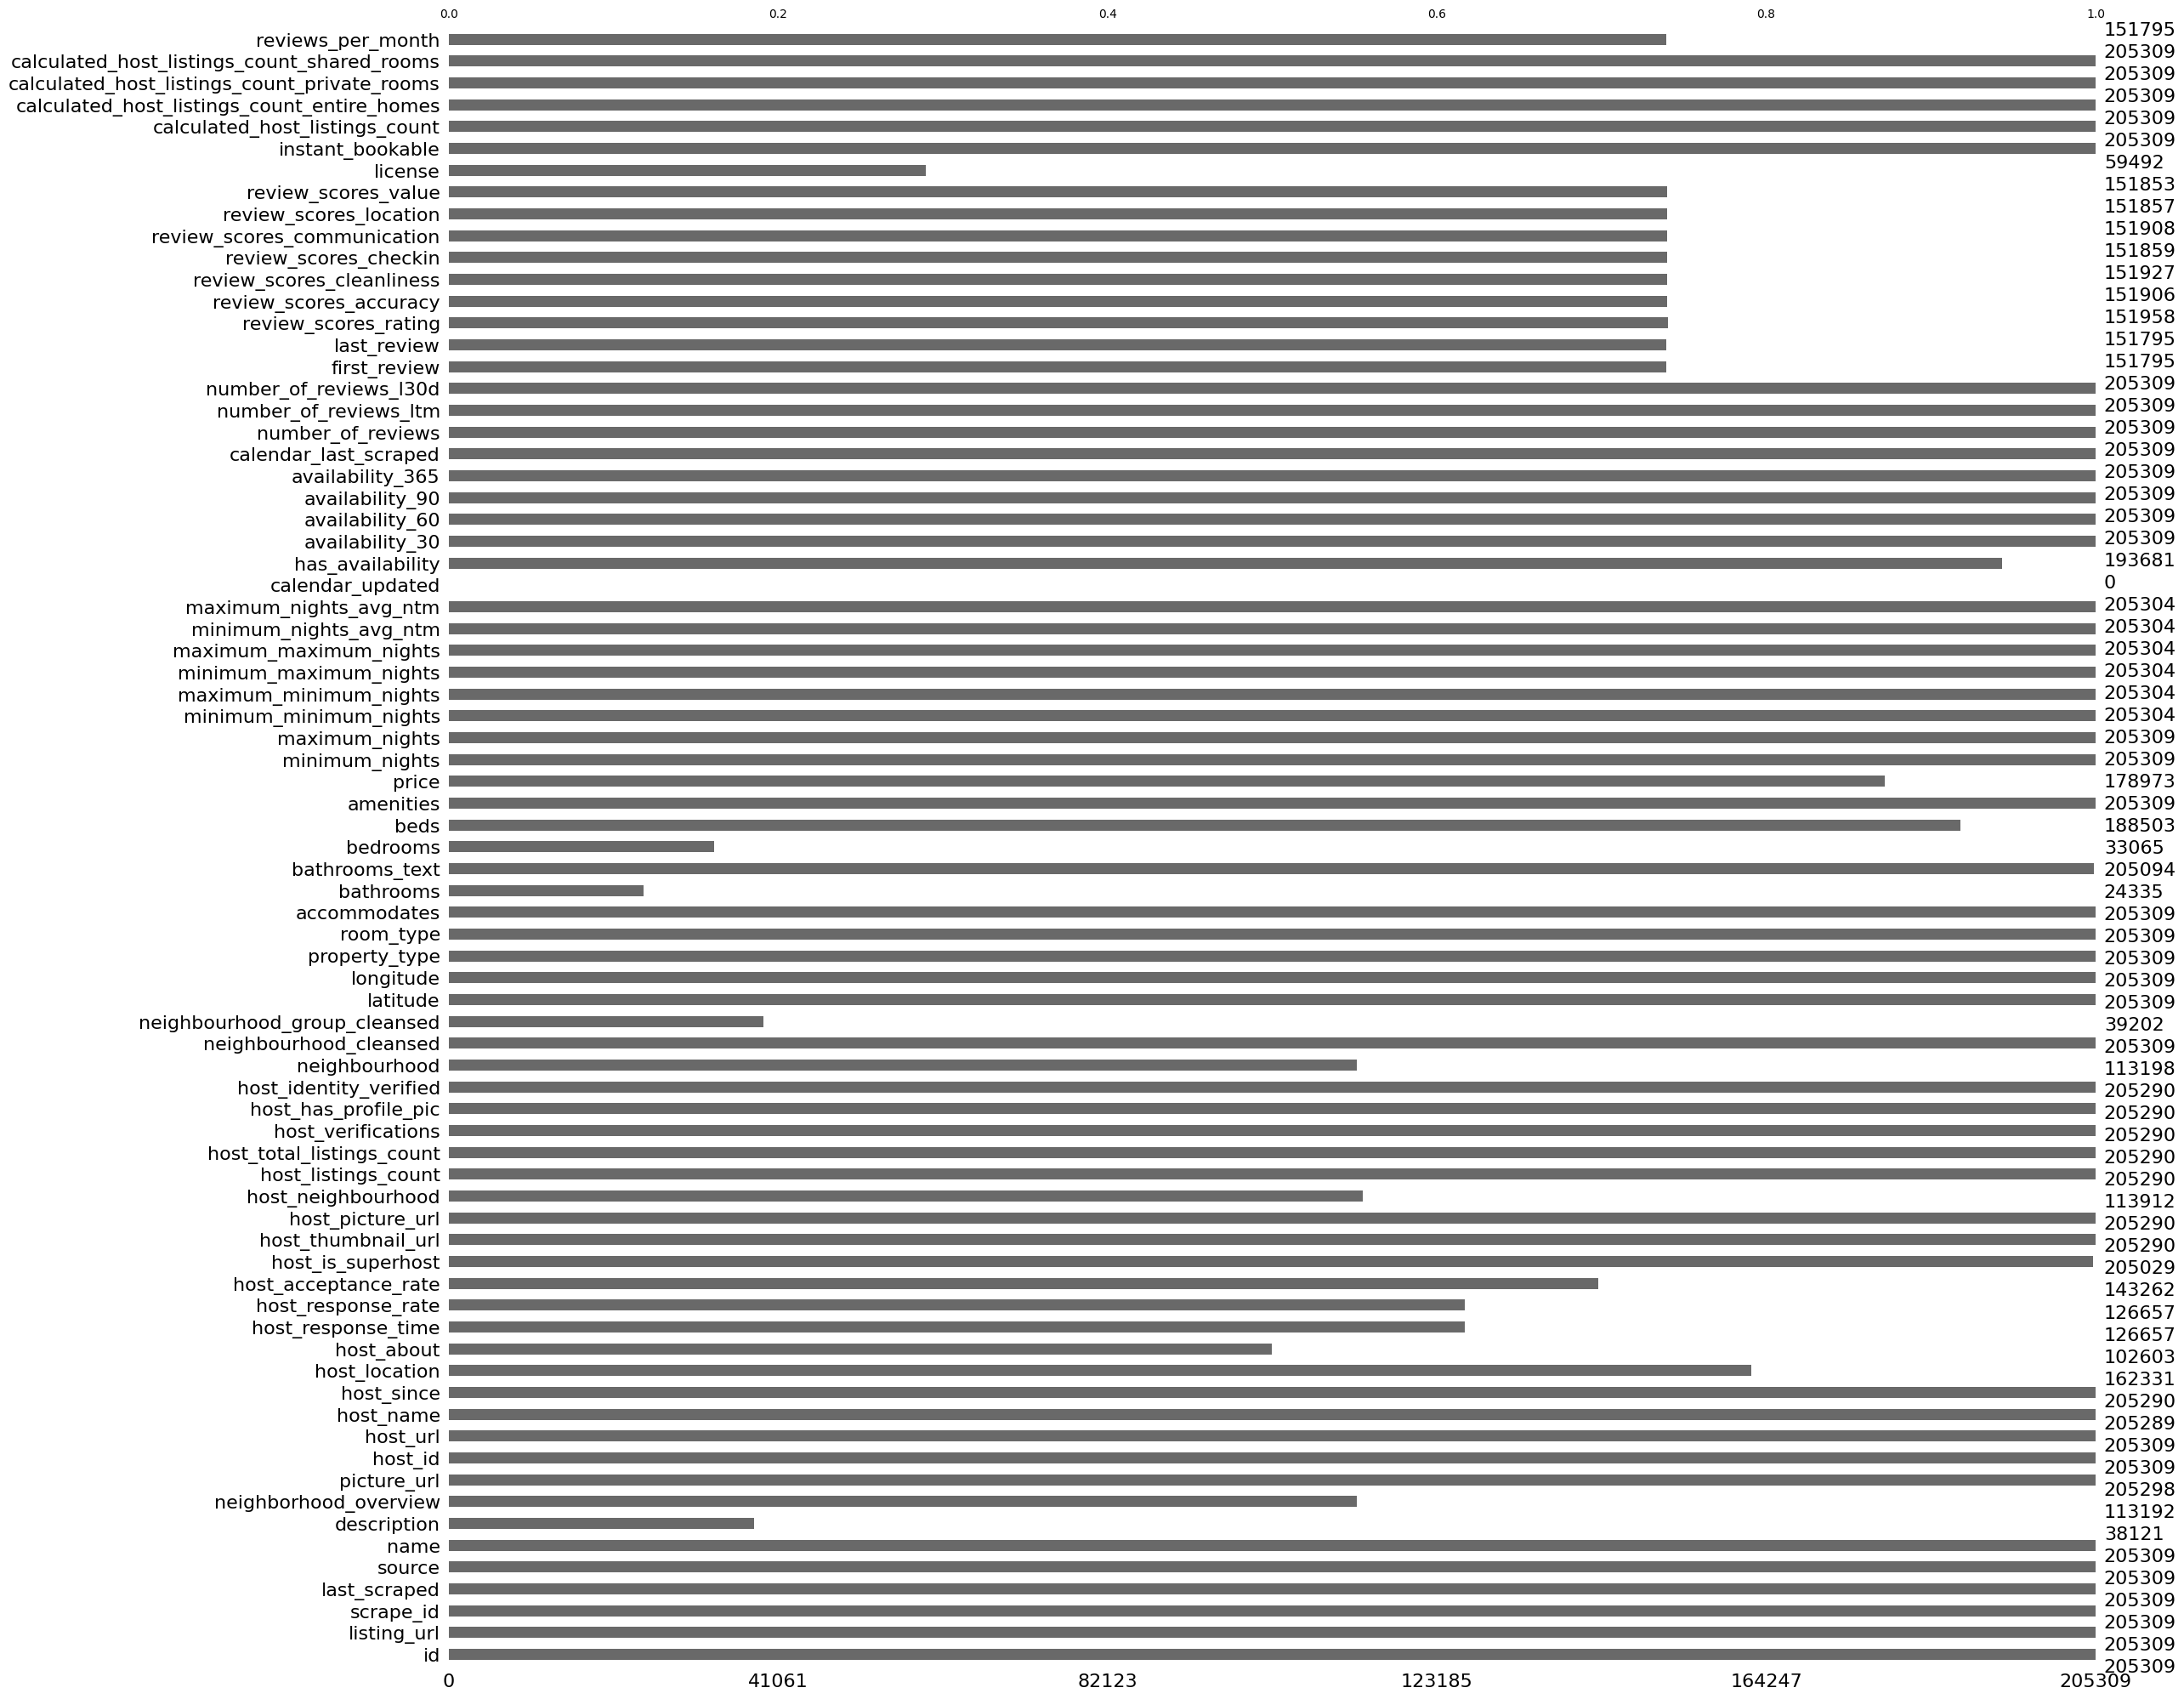

In [5]:
# check missing values

allData.isnull().values.sum()
allData.isna().sum()
msno.bar(allData)

In [6]:
# transfer columns into variables

# host_response_time = allData["host_response_time"]
# neighbourhood_group_cleansed = allData["neighbourhood_group_cleansed"]
# room_type = allData["room_type"]
# accommodates = allData["accommodates"]
# bathrooms_text = allData["bathrooms_text"]
# beds = allData["beds"]
# amenities = allData["amenities"]
# price = allData["price"]
# minimum_nights = allData["minimum_nights"]
# maximum_nights = allData["maximum_nights"]
# review_scores_rating = allData["review_scores_rating"]
# review_scores_cleanliness = allData["review_scores_cleanliness"]
# review_scores_accuracy = allData["review_scores_accuracy"]
# review_scores_checkin = allData["review_scores_checkin"]
# review_scores_communication = allData["review_scores_communication"]
# review_scores_location = allData["review_scores_location"]

In [7]:
# Attribute Analysis

px.box(allData, y="price")
px.histogram(allData, x="price")

In [8]:
# attribute selection

df = allData[['host_response_time', 'room_type', 'accommodates', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
              'review_scores_rating', 'review_scores_cleanliness', 'review_scores_accuracy',
              'review_scores_checkin', 'review_scores_communication', 'review_scores_location']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205309 entries, 0 to 205308
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   host_response_time           126657 non-null  object 
 1   room_type                    205309 non-null  object 
 2   accommodates                 205309 non-null  int64  
 3   beds                         188503 non-null  float64
 4   amenities                    205309 non-null  object 
 5   price                        178973 non-null  float64
 6   minimum_nights               205309 non-null  int64  
 7   maximum_nights               205309 non-null  int64  
 8   review_scores_rating         151958 non-null  float64
 9   review_scores_cleanliness    151927 non-null  float64
 10  review_scores_accuracy       151906 non-null  float64
 11  review_scores_checkin        151859 non-null  float64
 12  review_scores_communication  151908 non-null  float64
 13 

In [9]:
df["host_response_time"].unique()
df["room_type"].unique()
df["amenities"].unique()

array(['a few days or more', 'within an hour', 'within a day', nan,
       'within a few hours'], dtype=object)

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

array(['["Lock on bedroom door", "Hot tub", "Carbon monoxide alarm", "Smoke alarm", "Wifi", "Heating", "Dedicated workspace", "Air conditioning", "Security cameras on property", "Kitchen", "Host greets you"]',
       '["TV", "Microwave", "Bathtub", "Carbon monoxide alarm", "Stove", "Smoke alarm", "Wifi", "Freezer", "Air conditioning", "Kitchen"]',
       '["TV", "Lock on bedroom door", "Carbon monoxide alarm", "Smoke alarm", "Wifi", "Washer", "Fire extinguisher", "Air conditioning", "Security cameras on property", "Kitchen"]',
       ...,
       '["Self check-in", "Extra pillows and blankets", "Bed linens", "Smart lock", "Central heating", "Hot water", "Bathtub", "Stove", "Hair dryer", "Shampoo", "Backyard", "Dishwasher", "Portable fans", "TV", "Free parking on premises", "Cleaning products", "Sound system", "Carbon monoxide alarm", "Oven", "Books and reading material", "Smoke alarm", "Washer", "Fire extinguisher", "Coffee maker", "Baking sheet", "Clothing storage", "Shower gel", "Lugg

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

<Axes: >

price                          1.000000
accommodates                   0.186534
beds                           0.149984
review_scores_location         0.026887
review_scores_cleanliness      0.011997
review_scores_rating           0.004351
maximum_nights                -0.000681
review_scores_accuracy        -0.002635
review_scores_checkin         -0.008431
review_scores_communication   -0.011295
minimum_nights                -0.022275
Name: price, dtype: float64

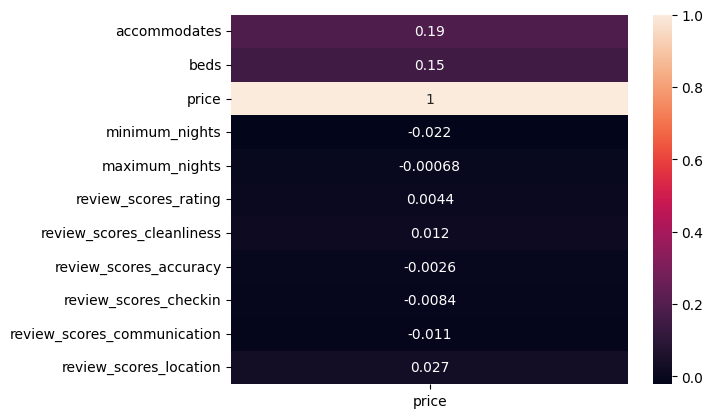

In [23]:
numeric_df = df.select_dtypes(include=['int64', 'float64'], exclude=['object'])

corr = numeric_df.corr()[['price']]
sns.heatmap(corr, annot=True)

correlation_matrix = numeric_df.corr()
correlation_matrix['price'].sort_values(ascending=False)


In [33]:
# Random Forest

# df_rf = numeric_df.drop('calendar_updated', axis=1)
df_rf = numeric_df.dropna()
# df_rf.shape

X = df_rf.drop('price', axis=1)
y = df_rf['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns

feature_importance_ranking = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feature_importance_ranking

RandomForestRegressor(random_state=42)

review_scores_cleanliness      0.182032
minimum_nights                 0.135002
review_scores_accuracy         0.121813
review_scores_communication    0.118327
review_scores_rating           0.114083
review_scores_checkin          0.086724
maximum_nights                 0.082818
review_scores_location         0.072323
accommodates                   0.053782
beds                           0.033095
dtype: float64